###**EXERCÍCIO: MODELO DE REGRESSÃO LINEAR E MÉTODO DE VALIDAÇÃO CRUZADA (K-FOLD)**

O dataset utilizado para este exercício refere-se à dados imobiliários de casas à venda.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn import datasets
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
#from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
import matplotlib_venn
import 

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
# Instalando bilioteca 
!pip install matplotlib-venn
!pip install Bias 
!pip isntall mse

ERROR: unknown command "isntall" - maybe you meant "install"


In [ ]:
#!apt-get -qq install -y libfluidsynth1

**Importando o Dataframe do Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Machine_Learning_Dellead/Datasets/real-estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#removendo a coluna sem dado
data.drop(columns=['No', 'X1 transaction date'],inplace=True)
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


a. Calcule estatísticas básicas usando o describe;

In [ ]:
data.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


b. Verifique se há dados faltantes. Caso haja, trate-os da forma que achar mais
conveniente para o contexto do problema;

In [ ]:
#caso haja dados faltante o método isnull() com o sum() irá enconctrar e fazer a soma
data.isnull() 
data.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

c. Verifique se há dados duplicados. Caso haja, trate-os da forma adequada.

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

d. Calcule a correlação dos atributos utilizando a função **corr do pandas com o
método de pearson**. O que você observa de acordo com a matriz de
correlações? Faça um gráfico de dispersão, e procure indícios visuais que
confirmem os valores de correlação encontrados na matriz.

***Essa correlação varia de -1 a 1 sendo:*** 

* 0.9 a 1 positivo ou negativo indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.



In [ ]:
#essa correlação varia de -1 a 1 sendo
data.corr('pearson')

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Continuação da questão: 


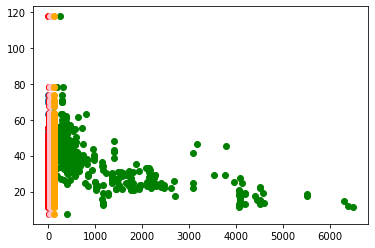

In [ ]:
#gráfico de dispersão (Hinessa me ajuda a entender no gráfica essas correlações)
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.scatter(data['X3 distance to the nearest MRT station'], data['Y house price of unit area'], color= 'green')
plt.scatter(data['X4 number of convenience stores'], data['Y house price of unit area'], color = 'red')
plt.scatter(data['X5 latitude'], data['Y house price of unit area'], color = 'pink')
plt.scatter(data['X6 longitude'], data['Y house price of unit area'], color = 'orange')

e. Verifique os valores dos dados, e os padronizem na mesma escala. Você pode
usar a função MinMaxScaler do sci-kit learn para isso.

In [ ]:
X = data.iloc[:, [2]].copy()
Y =  data.iloc[:, [4] ].copy()

In [ ]:
data2 = data.values
X = data2[:, :-1]
Y = data2[:, -1]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X, Y)
scaled = scaler.transform(X)

In [ ]:
X2 = scaled[:, :-1]


**Criando o modelo**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [2]:
lr = lm.LinearRegression()
model = lr.fit(x_train, y_train)
predicted = lr.predict(x_test)

NameError: ignored

In [3]:
mse, bias, var = bias_variance_decomp(lr, x_train, y_train, x_test, y_test, loss='mse')

NameError: ignored

In [4]:
print(mse, bias, var)

NameError: ignored

In [5]:
model.score(x_test, y_test)

NameError: ignored

In [6]:
r2_score(y_test, predicted)

NameError: ignored

In [ ]:
mean_squared_error(y_test, predicted)

89.33246568151952

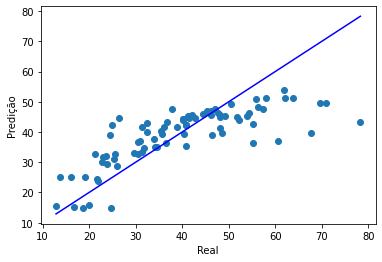

In [ ]:
plt.scatter(y_test, predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.ylabel("Predição")
plt.xlabel("Real")
plt.show()

f. Defina as variáveis X (variáveis independentes) e Y (variável dependente,
atributo classe da predição).

2. Crie um modelo de Regressão Linear que, dando como entrada os atributos da casa,
retorne o seu preço de venda:
a. Defina seus conjuntos de treino e teste (utilize as proporções 70% - 30% ou
80% - 20%);

Referências:
https://minerandodados.com.br/cafe-com-codigo-tratando-valores-faltantes-pandas-python/